<a href="https://www.kaggle.com/code/mesutssmn/telco-customer-churn?scriptVersionId=184800206" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border-radius: 40px; border: #5E5772 solid; padding: 12px; background-color: #3383; font-size: 150%; text-align: left;">

<h3 align="center"><font color='#300000'size=10%>TELCO CHURN ANALYSIS</font></h3>

<h4 align="left"><font color='#30000' size=5%>To Do :</font></h4>
    
<li> Cleaning dataset for classification</li>
    
<li> Some analysis and statistics</li>
    
<li> ML, ANN
    
    

<h3 align="left"><font color='#300000' size=5%>ABOUT DATA:</font></h3>

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

For more details, see the dataset description in https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113, even though the dataset used here is an older (and reduced) version. 
    

<div style="border-radius: 10px; overflow: hidden; text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:1358/0*8Iu_eymr6eR-YuQw" alt="Churn" width="900"></div>

<div style="border-radius: 10px; overflow: hidden; text-align: left;">
    <img src="https://miro.medium.com/v2/resize:fit:1000/1*n_0BmJJ8nRLLTI_POtfCBg.png" alt="Churn" width="900"></div>
</div>

   ##### Thank you for taking the time to read. Please don't ignore voting.


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LINKS </div>

#### **Name :** Mesut Suhan Şişman

<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Links</b></th>
        </tr>
        <tr>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/Mesutssmn"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/mesut-suhan-sisman/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
        </tr>
        <tr>
    </table>

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> IMPORTS </div>

In [1]:
# Base Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis Libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from scipy.stats import shapiro, levene, kruskal, ttest_ind, f_oneway
from tabulate import tabulate

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

#Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

import warnings
warnings.filterwarnings("ignore")

2024-06-21 22:57:31.623050: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 22:57:31.623168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 22:57:31.754594: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 55)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LOADING DATA </div>

In [3]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> FEATURES </div>

**customerID:** Unique customer identifier.

**gender:** Customer's gender .

**SeniorCitizen:** Indicates senior citizen status .

**Partner:** Indicates if customer has a partner .

**Dependents:** Indicates if customer has dependents .

**tenure:** Number of months with the company.

**PhoneService:** Indicates phone service .

**MultipleLines:** Indicates multiple lines .

**InternetService:** Type of internet service .

**OnlineSecurity:** Online security service .

**OnlineBackup:** Online backup service .

**DeviceProtection:** Device protection service .

**TechSupport:** Tech support service .

**StreamingTV:** Streaming TV service .

**StreamingMovies:** Streaming movies service .

**Contract:** Contract type .

**PaperlessBilling:** Paperless billing .

**PaymentMethod:** Payment method .

**MonthlyCharges:** Monthly charges.

**TotalCharges:** Total charges.

**Churn:** Indicates if customer churned.

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> DATA INFORMATION </div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.loc[df["TotalCharges"].str.contains(" "), "TotalCharges"] = np.nan
df.dropna(inplace = True)

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [8]:
df["TotalCharges"] = df["TotalCharges"].astype("float64")
df.drop("customerID", axis = 1, inplace = True)

In [9]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7032
Variables: 20
cat_cols: 17
num_cols: 3
cat_but_car: 0
num_but_cat: 1


In [10]:
cat_cols, num_cols, cat_but_car

(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Churn',
  'SeniorCitizen'],
 ['tenure', 'MonthlyCharges', 'TotalCharges'],
 [])

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> VISUALIZATIONS </div>

        gender  Ratio
gender               
Male      3549 50.469
Female    3483 49.531


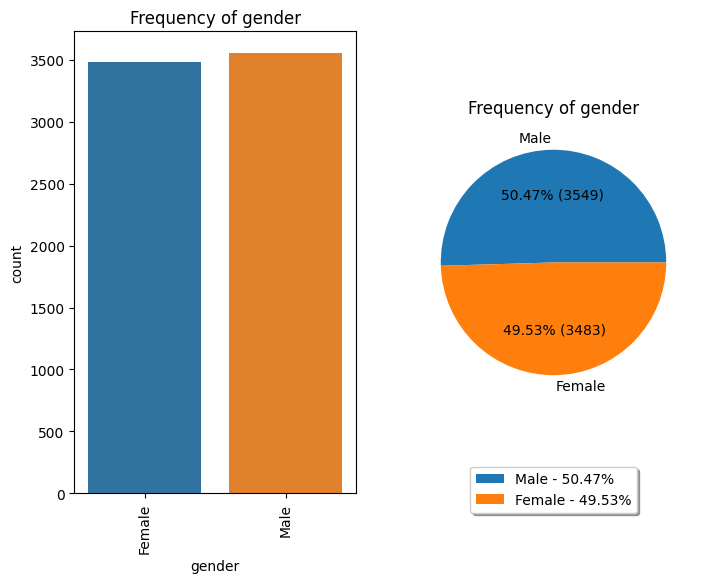

         Partner  Ratio
Partner                
No          3639 51.749
Yes         3393 48.251


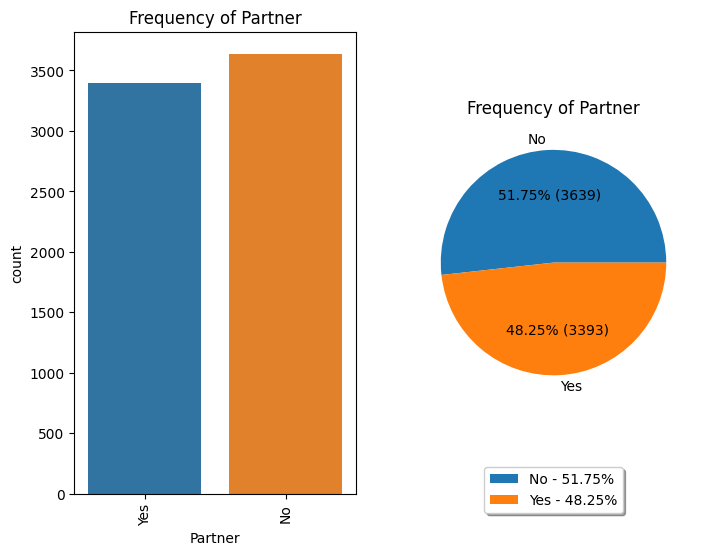

            Dependents  Ratio
Dependents                   
No                4933 70.151
Yes               2099 29.849


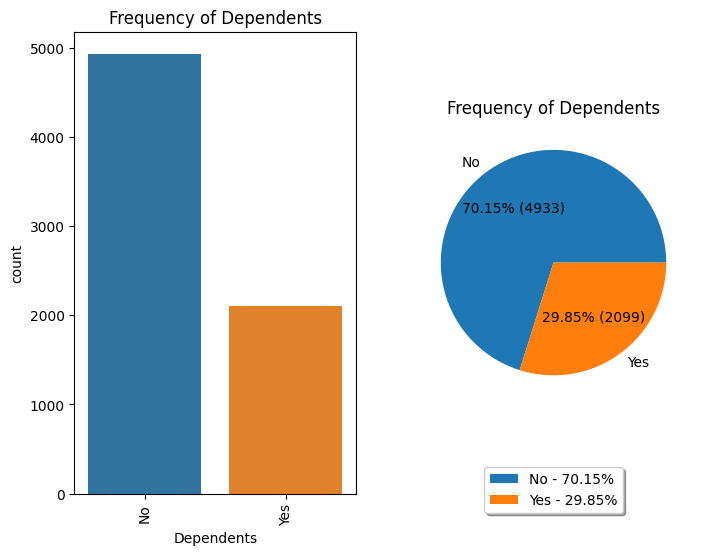

              PhoneService  Ratio
PhoneService                     
Yes                   6352 90.330
No                     680  9.670


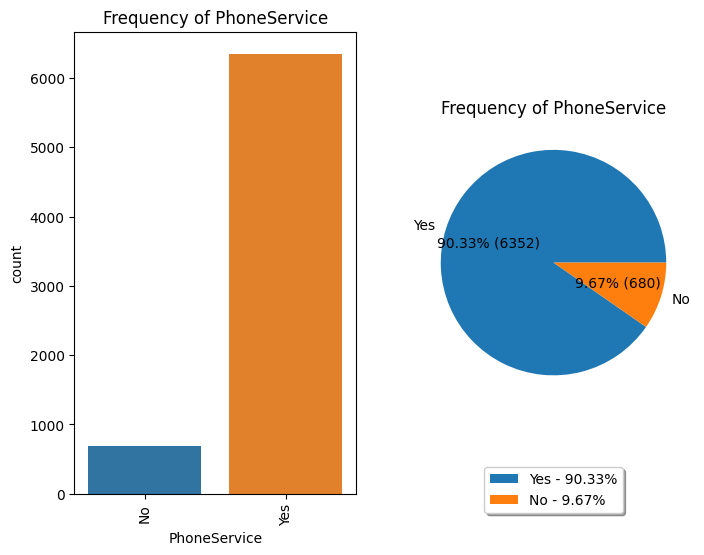

                  MultipleLines  Ratio
MultipleLines                         
No                         3385 48.137
Yes                        2967 42.193
No phone service            680  9.670


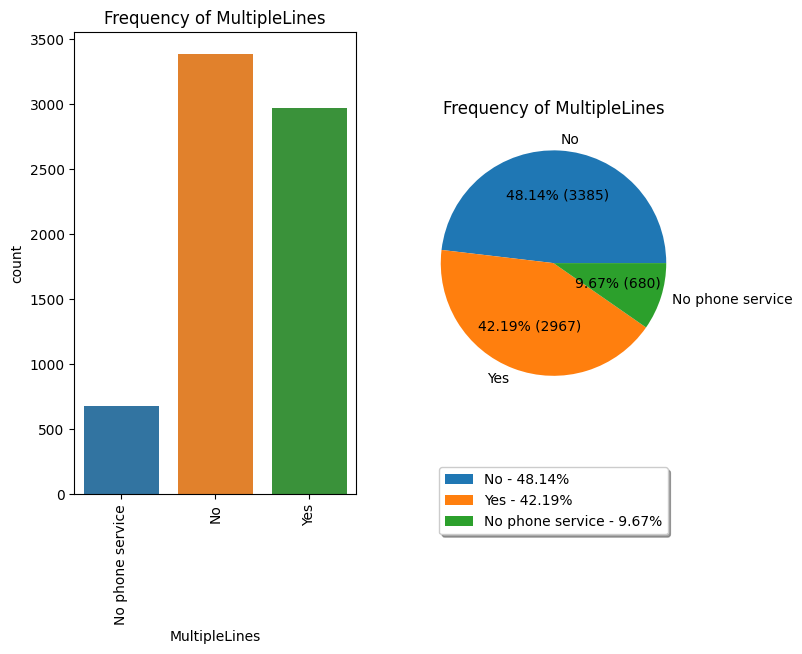

                 InternetService  Ratio
InternetService                        
Fiber optic                 3096 44.027
DSL                         2416 34.357
No                          1520 21.615


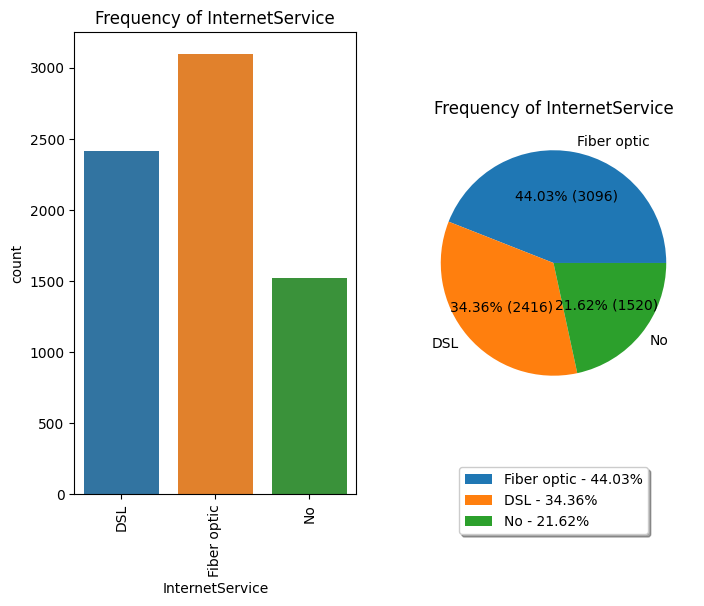

                     OnlineSecurity  Ratio
OnlineSecurity                            
No                             3497 49.730
Yes                            2015 28.655
No internet service            1520 21.615


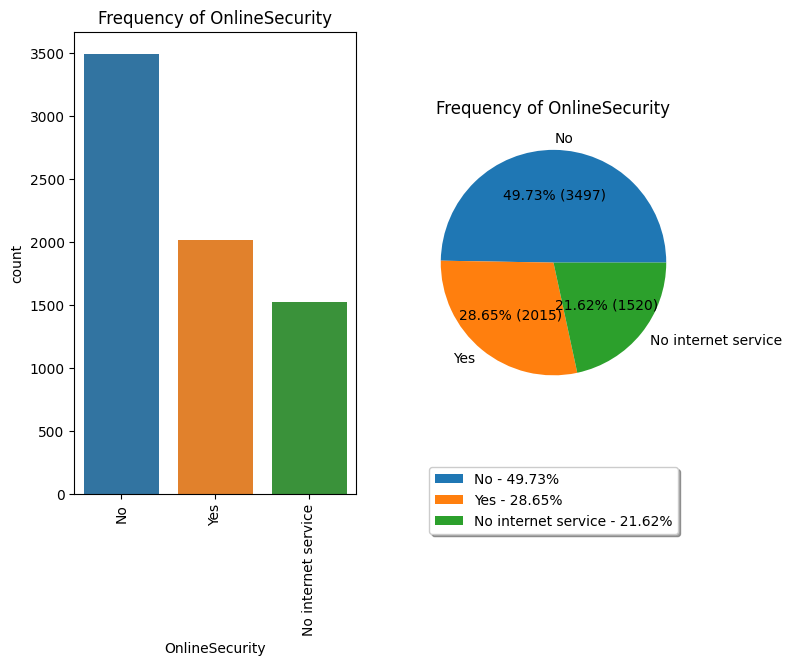

                     OnlineBackup  Ratio
OnlineBackup                            
No                           3087 43.899
Yes                          2425 34.485
No internet service          1520 21.615


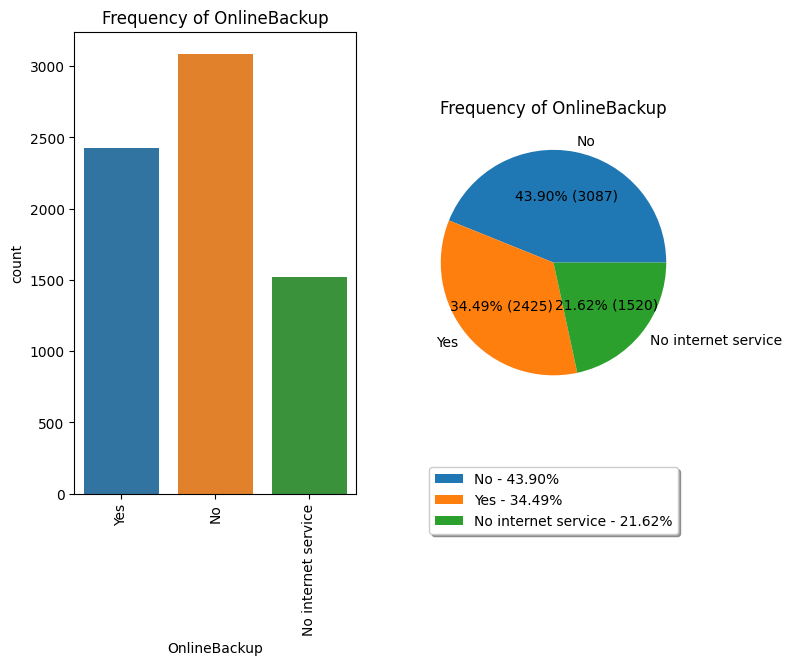

                     DeviceProtection  Ratio
DeviceProtection                            
No                               3094 43.999
Yes                              2418 34.386
No internet service              1520 21.615


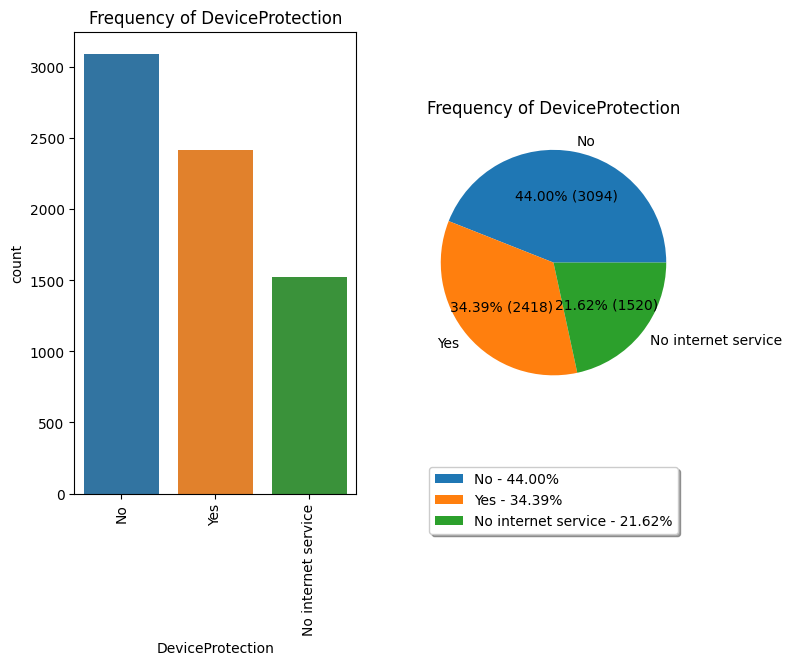

                     TechSupport  Ratio
TechSupport                            
No                          3472 49.374
Yes                         2040 29.010
No internet service         1520 21.615


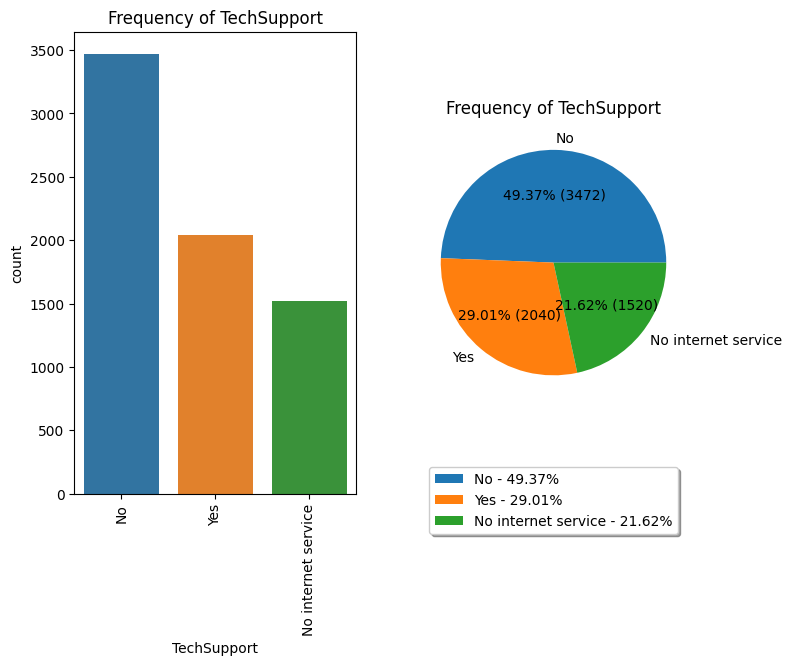

                     StreamingTV  Ratio
StreamingTV                            
No                          2809 39.946
Yes                         2703 38.439
No internet service         1520 21.615


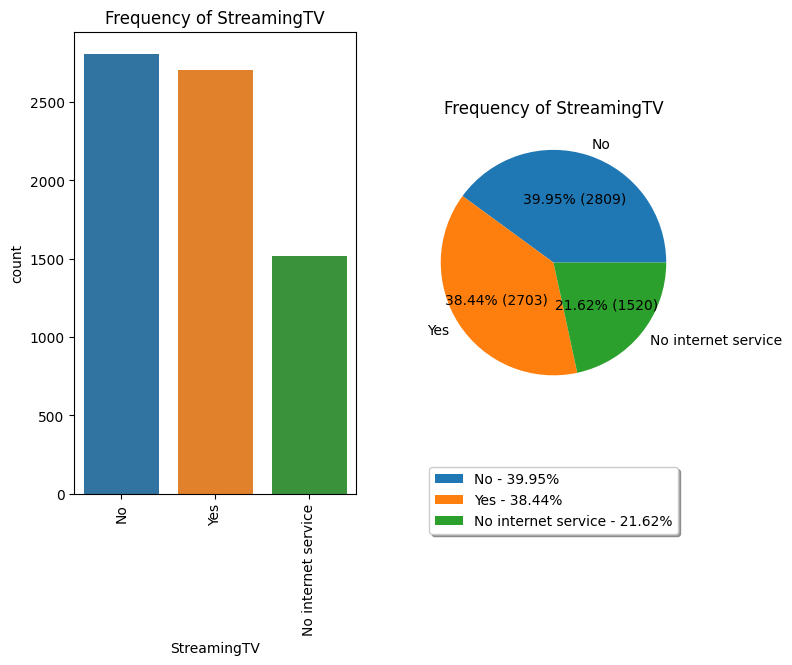

                     StreamingMovies  Ratio
StreamingMovies                            
No                              2781 39.548
Yes                             2731 38.837
No internet service             1520 21.615


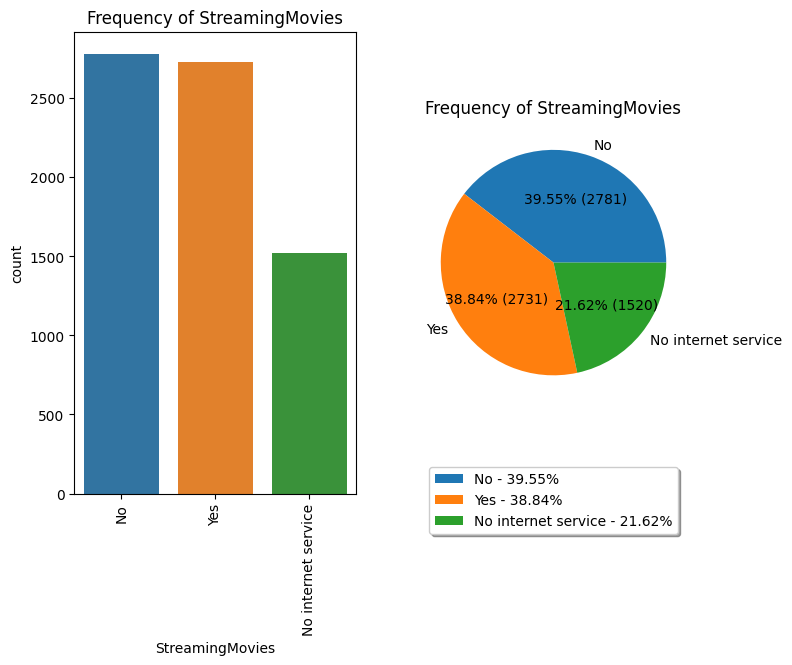

                Contract  Ratio
Contract                       
Month-to-month      3875 55.105
Two year            1685 23.962
One year            1472 20.933


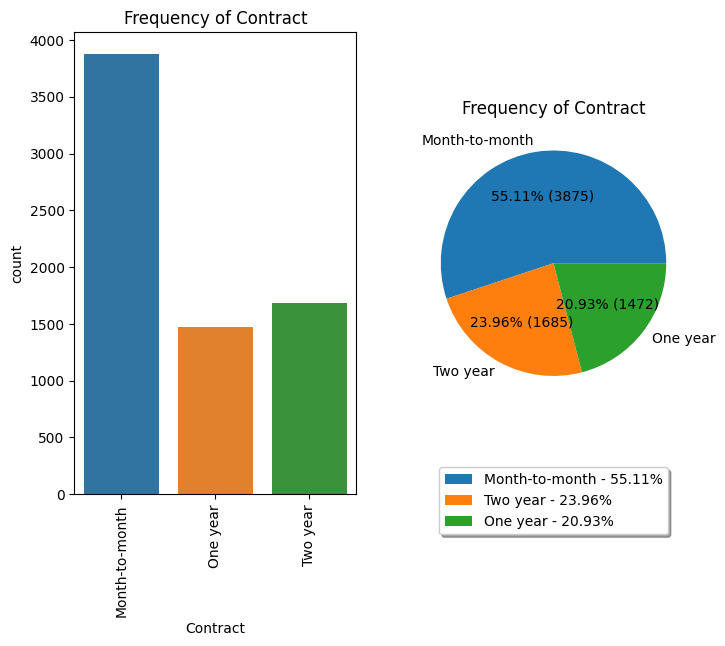

                  PaperlessBilling  Ratio
PaperlessBilling                         
Yes                           4168 59.272
No                            2864 40.728


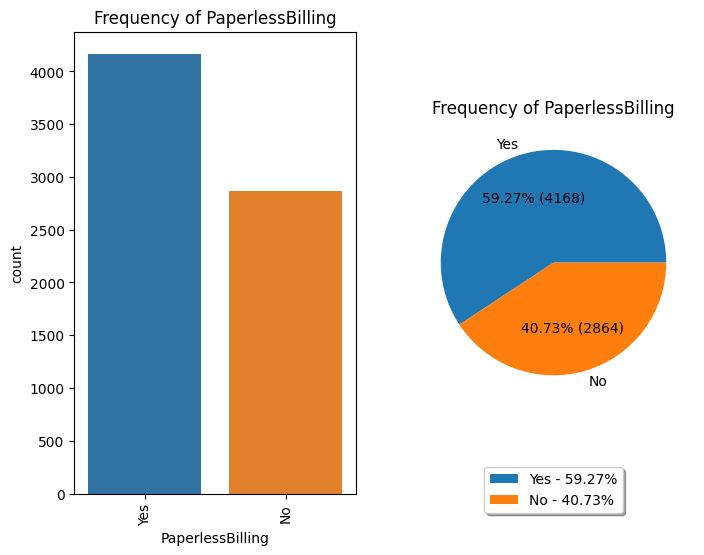

                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365 33.632
Mailed check                        1604 22.810
Bank transfer (automatic)           1542 21.928
Credit card (automatic)             1521 21.630


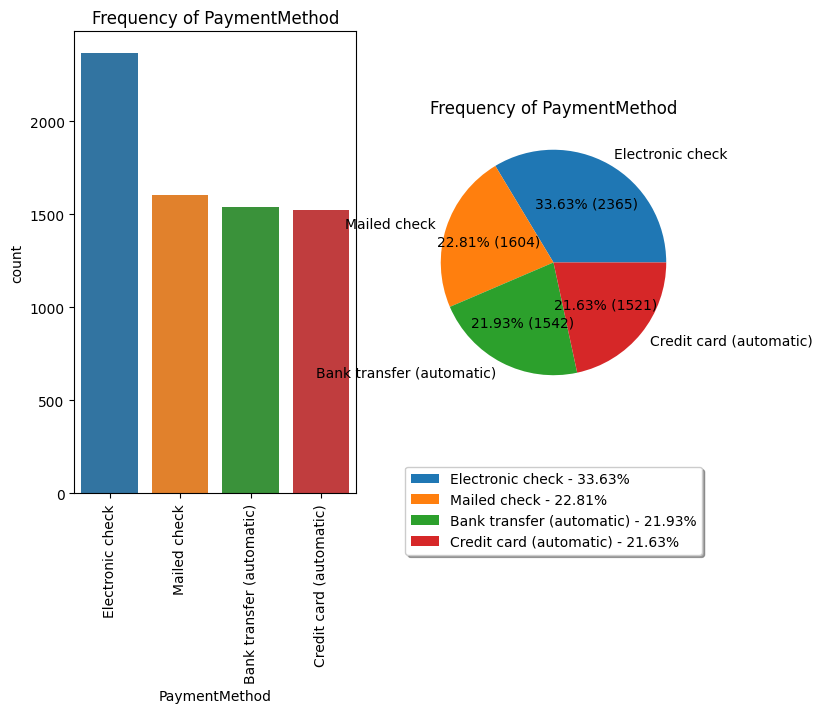

       Churn  Ratio
Churn              
No      5163 73.422
Yes     1869 26.578


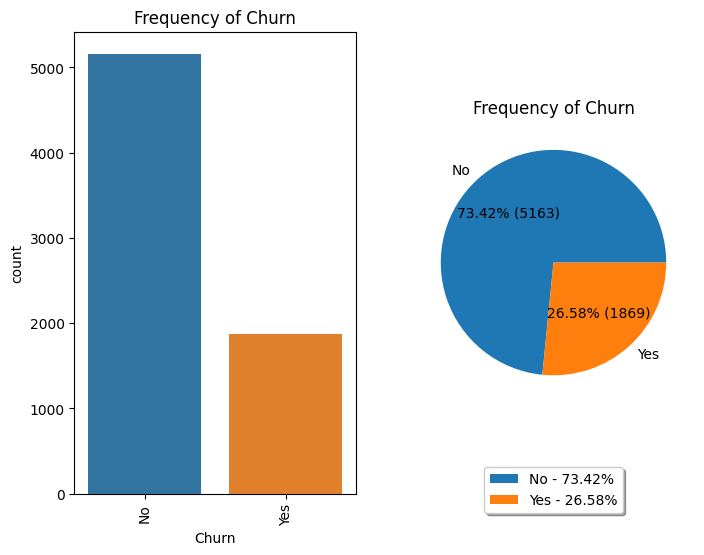

               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5890 83.760
1                       1142 16.240


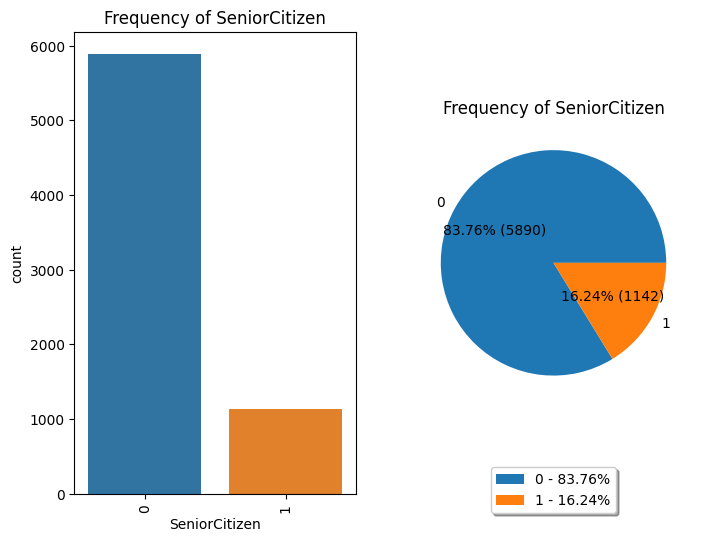

In [11]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, True)

count   7032.000
mean      32.422
std       24.545
min        1.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.800
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


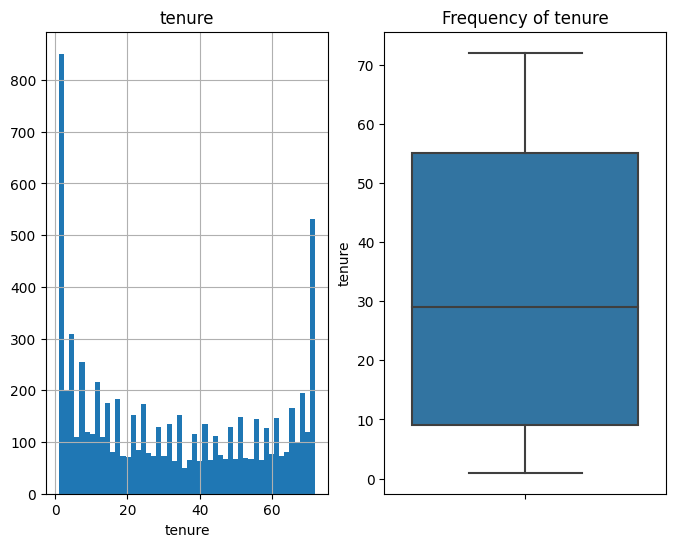

#####################################
count   7032.000
mean      64.798
std       30.086
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.900
40%       58.920
50%       70.350
60%       79.150
70%       85.535
80%       94.300
90%      102.645
95%      107.422
99%      114.734
max      118.750
Name: MonthlyCharges, dtype: float64


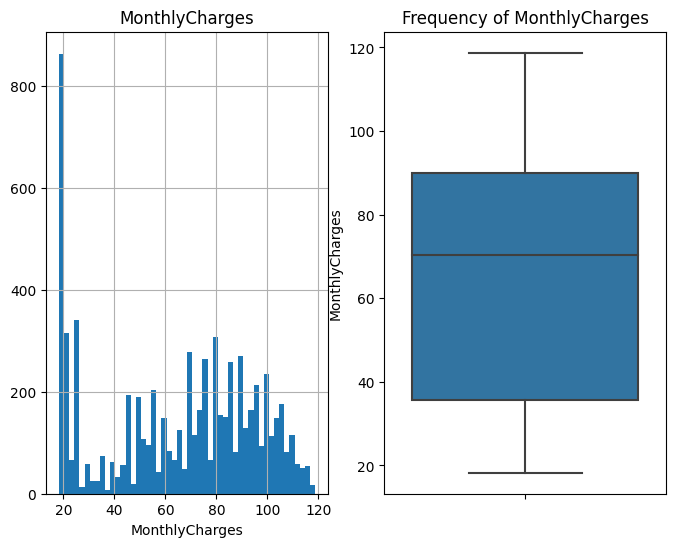

#####################################
count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


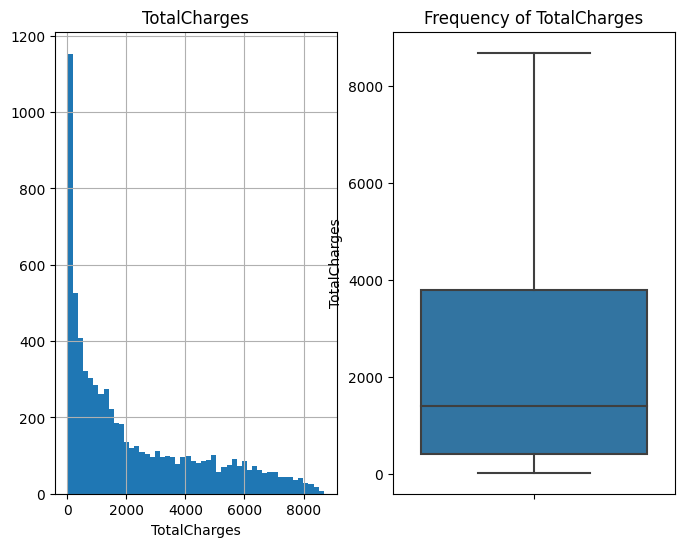

#####################################


In [12]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
            fig, axs = plt.subplots(1, 2, figsize=(8, 6))
            plt.subplot(1, 2, 1)
            dataframe[numerical_col].hist(bins=50)
            plt.xlabel(numerical_col)
            plt.title(numerical_col)

            plt.subplot(1, 2, 2)
            sns.boxplot(y=numerical_col, data=dataframe)
            plt.title("Frequency of " + numerical_col)
            plt.xticks(rotation=90)

            plt.show(block=True)      

    print("#####################################")

for col in num_cols:
    num_summary(df, col, plot=True)

In [13]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Churn", col)

       tenure
Churn        
No     37.650
Yes    17.979


       MonthlyCharges
Churn                
No             61.307
Yes            74.441


       TotalCharges
Churn              
No         2555.344
Yes        1531.796




# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> FEATURE EXTRACTION </div>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [15]:
onehot = ["gender", "MultipleLines","Contract", "PaymentMethod"]
labelenc = ['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [16]:
le = LabelEncoder()
for i in labelenc:
    if (df[i].dtype == "int64") | (df[i].dtype == "float64"):
        pass
    else:
        df[i] = le.fit_transform(df[i])

In [17]:
df = pd.get_dummies(df, columns = onehot, drop_first = True, dtype = int)

In [18]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,2,0,0,0,0,1,29.850,29.850,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,2,0,2,0,0,0,0,56.950,1889.500,0,1,0,0,1,0,0,0,1
2,0,0,0,2,1,0,2,2,0,0,0,0,1,53.850,108.150,1,1,0,0,0,0,0,0,1
3,0,0,0,45,0,0,2,0,2,2,0,0,0,42.300,1840.750,0,1,1,0,1,0,0,0,0
4,0,0,0,2,1,1,0,0,0,0,0,0,1,70.700,151.650,1,0,0,0,0,0,0,1,0


In [19]:
def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [20]:
for col in df[num_cols].columns:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

tenure False
MonthlyCharges False
TotalCharges False


In [21]:
for col in df[num_cols].columns:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


In [22]:
df.columns = [col.upper() for col in df.columns]

df.head()

,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,PAPERLESSBILLING,MONTHLYCHARGES,TOTALCHARGES,CHURN,GENDER_MALE,MULTIPLELINES_NO PHONE SERVICE,MULTIPLELINES_YES,CONTRACT_ONE YEAR,CONTRACT_TWO YEAR,PAYMENTMETHOD_CREDIT CARD (AUTOMATIC),PAYMENTMETHOD_ELECTRONIC CHECK,PAYMENTMETHOD_MAILED CHECK
0,0,1,0,1,0,0,0,2,0,0,0,0,1,29.850,29.850,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,2,0,2,0,0,0,0,56.950,1889.500,0,1,0,0,1,0,0,0,1
2,0,0,0,2,1,0,2,2,0,0,0,0,1,53.850,108.150,1,1,0,0,0,0,0,0,1
3,0,0,0,45,0,0,2,0,2,2,0,0,0,42.300,1840.750,0,1,1,0,1,0,0,0,0
4,0,0,0,2,1,1,0,0,0,0,0,0,1,70.700,151.650,1,0,0,0,0,0,0,1,0


In [23]:
df['INTERNETSERVICE'].value_counts()

INTERNETSERVICE
1    3096
0    2416
2    1520
Name: count, dtype: int64

In [24]:
df['AVG_MONTHLY_CHARGES'] = df['TOTALCHARGES'] / df['TENURE'].replace(0, 1)
df['HAS_PHONE_SERVICE'] = df['PHONESERVICE']
df['HAS_INTERNET_SERVICE'] = df['INTERNETSERVICE'].apply(lambda x: 1 if x > 0 else 0)

# Total Additional Services
df['TOTAL_ADDITIONAL_SERVICES'] = (
    df['ONLINESECURITY'] + df['ONLINEBACKUP'] + 
    df['DEVICEPROTECTION'] + df['TECHSUPPORT'] + 
    df['STREAMINGTV'] + df['STREAMINGMOVIES'])

# Tenure Group
df['TENURE_GROUP'] = pd.cut(df['TENURE'], bins=[1, 12, 36, float('inf')], labels=['New', 'Intermediate', 'Loyal'])
df['AUTOMATIC_PAYMENT'] = (df['PAYMENTMETHOD_CREDIT CARD (AUTOMATIC)'] | df['PAYMENTMETHOD_ELECTRONIC CHECK']).astype(int)

# Service Type
def service_type(row):
    if row['HAS_PHONE_SERVICE'] == 1 and row['HAS_INTERNET_SERVICE'] == 0:
        return 'Phone Only'
    elif row['HAS_PHONE_SERVICE'] == 0 and row['HAS_INTERNET_SERVICE'] == 1:
        return 'Internet Only'
    elif row['HAS_PHONE_SERVICE'] == 1 and row['HAS_INTERNET_SERVICE'] == 1:
        return 'Phone and Internet'
    else:
        return 'No Service'
    
df['SERVICE_TYPE'] = df.apply(service_type, axis=1)

# Dependents Status
def dependents_status(row):
    if row['SENIORCITIZEN'] == 1 and row['DEPENDENTS'] == 1:
        return 'Senior with Dependents'
    elif row['SENIORCITIZEN'] == 1 and row['DEPENDENTS'] == 0:
        return 'Senior without Dependents'
    elif row['SENIORCITIZEN'] == 0 and row['DEPENDENTS'] == 1:
        return 'Not Senior with Dependents'
    else:
        return 'Not Senior without Dependents'

df['DEPENDENTS_STATUS'] = df.apply(dependents_status, axis=1)

df['TOTAL_SERVICES'] = df['HAS_PHONE_SERVICE'] + df['HAS_INTERNET_SERVICE'] + df['TOTAL_ADDITIONAL_SERVICES']


In [25]:
df = pd.get_dummies(df, columns = ["TENURE_GROUP", "SERVICE_TYPE", "DEPENDENTS_STATUS"] , drop_first = True, dtype = int)

In [26]:
df.head()

,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,PAPERLESSBILLING,MONTHLYCHARGES,TOTALCHARGES,CHURN,GENDER_MALE,MULTIPLELINES_NO PHONE SERVICE,MULTIPLELINES_YES,CONTRACT_ONE YEAR,CONTRACT_TWO YEAR,PAYMENTMETHOD_CREDIT CARD (AUTOMATIC),PAYMENTMETHOD_ELECTRONIC CHECK,PAYMENTMETHOD_MAILED CHECK,AVG_MONTHLY_CHARGES,HAS_PHONE_SERVICE,HAS_INTERNET_SERVICE,TOTAL_ADDITIONAL_SERVICES,AUTOMATIC_PAYMENT,TOTAL_SERVICES,TENURE_GROUP_Intermediate,TENURE_GROUP_Loyal,SERVICE_TYPE_Phone Only,SERVICE_TYPE_Phone and Internet,DEPENDENTS_STATUS_Not Senior without Dependents,DEPENDENTS_STATUS_Senior with Dependents,DEPENDENTS_STATUS_Senior without Dependents
0,0,1,0,1,0,0,0,2,0,0,0,0,1,29.850,29.850,0,0,1,0,0,0,0,1,0,29.850,0,0,2,1,2,0,0,0,0,1,0,0
1,0,0,0,34,1,0,2,0,2,0,0,0,0,56.950,1889.500,0,1,0,0,1,0,0,0,1,55.574,1,0,4,0,5,1,0,1,0,1,0,0
2,0,0,0,2,1,0,2,2,0,0,0,0,1,53.850,108.150,1,1,0,0,0,0,0,0,1,54.075,1,0,4,0,5,0,0,1,0,1,0,0
3,0,0,0,45,0,0,2,0,2,2,0,0,0,42.300,1840.750,0,1,1,0,1,0,0,0,0,40.906,0,0,6,0,6,0,1,0,0,1,0,0
4,0,0,0,2,1,1,0,0,0,0,0,0,1,70.700,151.650,1,0,0,0,0,0,0,1,0,75.825,1,1,0,1,2,0,0,0,1,1,0,0


In [27]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7032
Variables: 37
cat_cols: 32
num_cols: 5
cat_but_car: 0
num_but_cat: 32


In [28]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,PAPERLESSBILLING,MONTHLYCHARGES,TOTALCHARGES,CHURN,GENDER_MALE,MULTIPLELINES_NO PHONE SERVICE,MULTIPLELINES_YES,CONTRACT_ONE YEAR,CONTRACT_TWO YEAR,PAYMENTMETHOD_CREDIT CARD (AUTOMATIC),PAYMENTMETHOD_ELECTRONIC CHECK,PAYMENTMETHOD_MAILED CHECK,AVG_MONTHLY_CHARGES,HAS_PHONE_SERVICE,HAS_INTERNET_SERVICE,TOTAL_ADDITIONAL_SERVICES,AUTOMATIC_PAYMENT,TOTAL_SERVICES,TENURE_GROUP_Intermediate,TENURE_GROUP_Loyal,SERVICE_TYPE_Phone Only,SERVICE_TYPE_Phone and Internet,DEPENDENTS_STATUS_Not Senior without Dependents,DEPENDENTS_STATUS_Senior with Dependents,DEPENDENTS_STATUS_Senior without Dependents
0,0,1,0,0.000,0,0,0,2,0,0,0,0,1,0.115,0.001,0,0,1,0,0,0,0,1,0,0.149,0,0,2,1,0.143,0,0,0,0,1,0,0
1,0,0,0,0.465,1,0,2,0,2,0,0,0,0,0.385,0.216,0,1,0,0,1,0,0,0,1,0.388,1,0,4,0,0.357,1,0,1,0,1,0,0
2,0,0,0,0.014,1,0,2,2,0,0,0,0,1,0.354,0.010,1,1,0,0,0,0,0,0,1,0.374,1,0,4,0,0.357,0,0,1,0,1,0,0
3,0,0,0,0.620,0,0,2,0,2,2,0,0,0,0.239,0.210,0,1,1,0,1,0,0,0,0,0.252,0,0,6,0,0.429,0,1,0,0,1,0,0
4,0,0,0,0.014,1,1,0,0,0,0,0,0,1,0.522,0.015,1,0,0,0,0,0,0,1,0,0.577,1,1,0,1,0.143,0,0,0,1,1,0,0


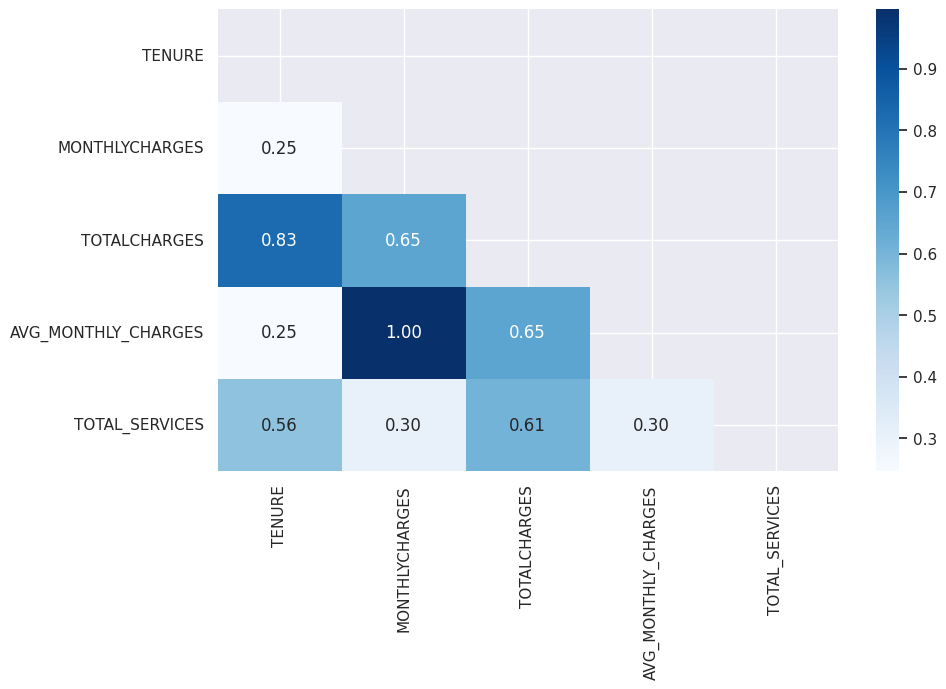

In [29]:
corr = df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(rc={'figure.figsize': (10, 6)})
sns.heatmap(corr,mask = mask, cmap="Blues", annot=True, fmt=".2f")
plt.show()

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> ML MODELLING </div>

In [30]:
y = df["CHURN"]
X = df.drop("CHURN", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [31]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.79
Recall: 0.615
Precision: 0.48
F1: 0.54
Auc: 0.72


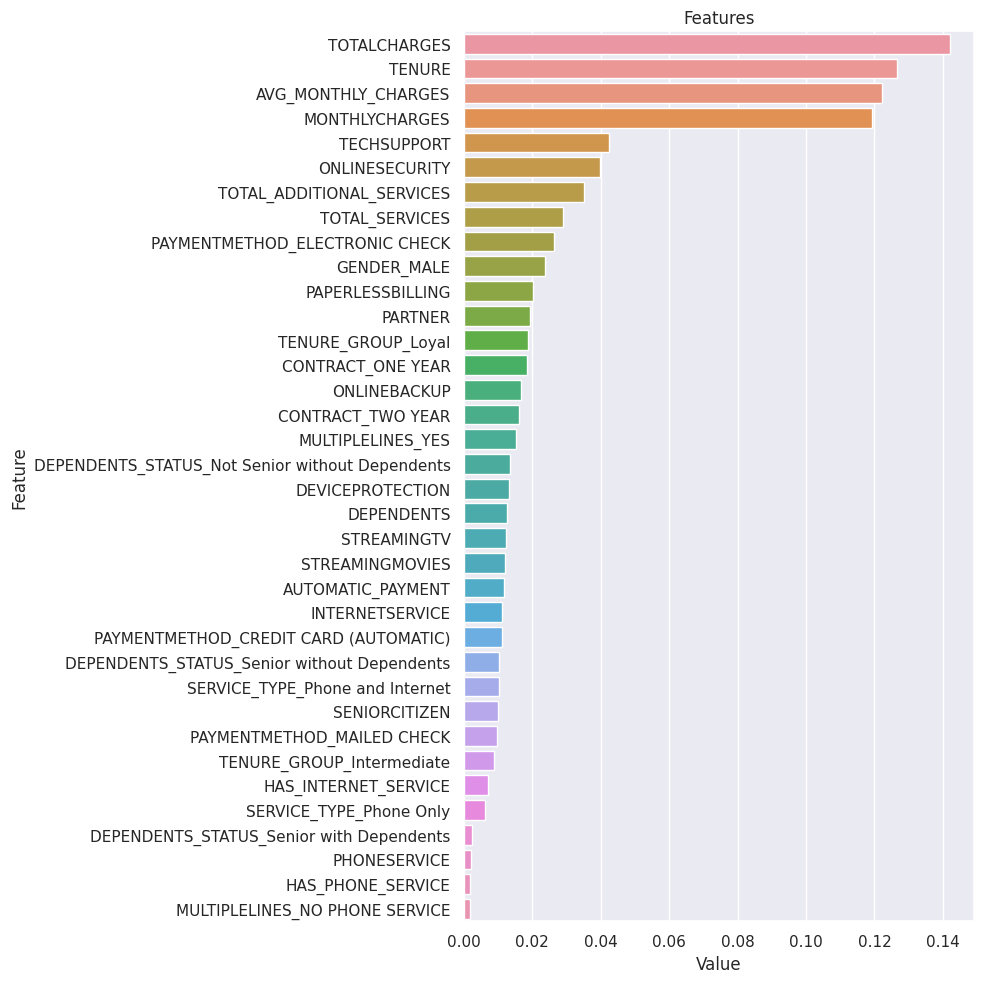

In [32]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)

In [33]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier(n_estimators=200)),
          ('SVC', SVC()),
          ('GBM', GradientBoostingClassifier(n_estimators=200, learning_rate=0.06)),
          ("XGBoost", XGBClassifier(learning_rate=0.06)),
          ("LightGBM", LGBMClassifier(learning_rate=0.06, verbose=-1)),
          ("CatBoost", CatBoostClassifier(learning_rate=0.06,verbose=False))]

In [34]:
acclist=[]
for name, model in models:
    acc = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy"))
    acclist.append([name,acc])
    print(f"ACC: {round(acc, 4)} ({name}) ")

ACC: 0.8075 (LR) 
ACC: 0.7637 (KNN) 
ACC: 0.7308 (CART) 
ACC: 0.7969 (RF) 
ACC: 0.7996 (SVC) 
ACC: 0.8062 (GBM) 
ACC: 0.8003 (XGBoost) 
ACC: 0.8013 (LightGBM) 
ACC: 0.7933 (CatBoost) 


In [35]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

gbm_accuracy=round(accuracy_score(y_test,y_pred), 4)*100
gbm_accuracy

78.67

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1300
           1       0.61      0.48      0.54       458

    accuracy                           0.79      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.77      0.79      0.78      1758



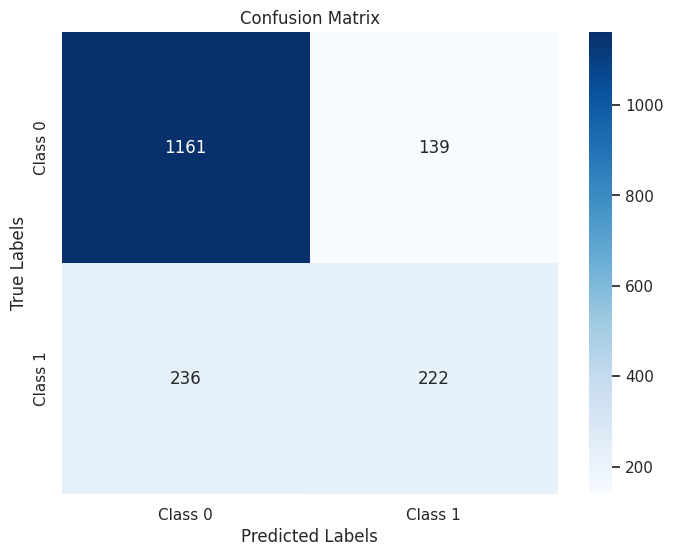

In [37]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [38]:
"""lgb_model = LGBMClassifier(verbose=-1, random_state=42)
lgb_params = {
    "learning_rate": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1],
    "n_estimators": [100, 200, 400, 500, 800, 1000, 1500],
    "depth": [4, 6, 8, 10],
    "l2_leaf_reg": [1, 3, 5, 7, 9]}
lgb_random_search = RandomizedSearchCV(lgb_model,
                                        lgb_params,
                                        cv=3,
                                        n_jobs=-1,
                                        verbose=1,
                                        random_state=42,
                                        scoring='accuracy').fit(X_train, y_train)"""

'lgb_model = LGBMClassifier(verbose=-1, random_state=42)\nlgb_params = {\n    "learning_rate": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1],\n    "n_estimators": [100, 200, 400, 500, 800, 1000, 1500],\n    "depth": [4, 6, 8, 10],\n    "l2_leaf_reg": [1, 3, 5, 7, 9]}\nlgb_random_search = RandomizedSearchCV(lgb_model,\n                                        lgb_params,\n                                        cv=3,\n                                        n_jobs=-1,\n                                        verbose=1,\n                                        random_state=42,\n                                        scoring=\'accuracy\').fit(X_train, y_train)'

In [39]:
"""print("Best parameters:", lgb_random_search.best_params_)
print("Best Scores:", lgb_random_search.best_score_)"""

'print("Best parameters:", lgb_random_search.best_params_)\nprint("Best Scores:", lgb_random_search.best_score_)'

In [40]:
"""best_model = lgb_random_search.best_estimator_
y_pred_lgb = best_model.predict(X_test)

lgb_accuracy=round(accuracy_score(y_test,y_pred_lgb), 4)*100
lgb_accuracy"""

'best_model = lgb_random_search.best_estimator_\ny_pred_lgb = best_model.predict(X_test)\n\nlgb_accuracy=round(accuracy_score(y_test,y_pred_lgb), 4)*100\nlgb_accuracy'

In [41]:
best_params_lgb = {'n_estimators': 400, 'learning_rate': 0.02, 'l2_leaf_reg': 5, 'depth': 4}

In [42]:
best_model = LGBMClassifier(**best_params_lgb, verbose=-1, random_state=42)
best_model.fit(X_train, y_train)
y_pred_lgb = best_model.predict(X_test)

lgb_accuracy = round(accuracy_score(y_test,y_pred_lgb), 4)*100
lgb_accuracy

78.33

In [43]:
print(classification_report(y_test,y_pred_lgb))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1300
           1       0.60      0.50      0.55       458

    accuracy                           0.78      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.77      0.78      0.78      1758



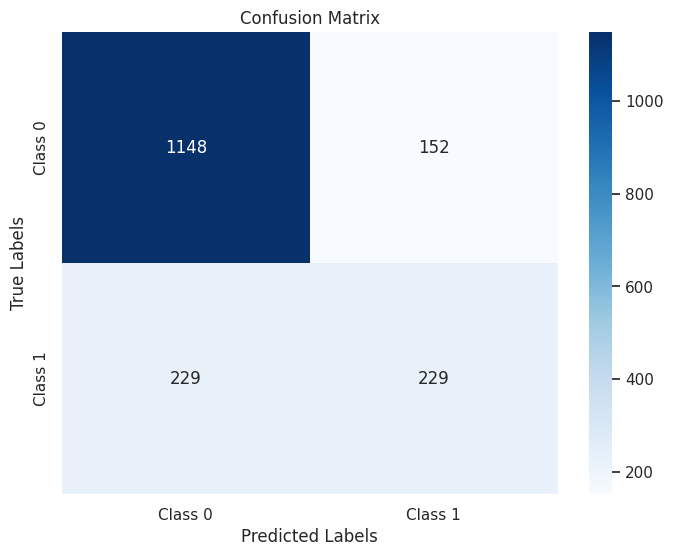

In [44]:
cm = confusion_matrix(y_test, y_pred_lgb)

class_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [45]:
"""rf_model = RandomForestClassifier(verbose=False, random_state=42)
rf_params = {
    "n_estimators": [100, 200, 400, 500, 800, 1000, 1500],
    "max_depth": [4, 6, 8, 10, 12, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
    "bootstrap": [True, False]}
rf_random_search = RandomizedSearchCV(rf_model,
                                        rf_params,
                                        cv=3,
                                        n_jobs=-1,
                                        verbose=1,
                                        random_state=42,
                                        scoring='accuracy').fit(X_train, y_train)"""

'rf_model = RandomForestClassifier(verbose=False, random_state=42)\nrf_params = {\n    "n_estimators": [100, 200, 400, 500, 800, 1000, 1500],\n    "max_depth": [4, 6, 8, 10, 12, None],\n    "min_samples_split": [2, 5, 10],\n    "min_samples_leaf": [1, 2, 4],\n    "max_features": ["auto", "sqrt", "log2"],\n    "bootstrap": [True, False]}\nrf_random_search = RandomizedSearchCV(rf_model,\n                                        rf_params,\n                                        cv=3,\n                                        n_jobs=-1,\n                                        verbose=1,\n                                        random_state=42,\n                                        scoring=\'accuracy\').fit(X_train, y_train)'

In [46]:
"""print("Best parameters:", rf_random_search.best_params_)
print("Best Scores:", rf_random_search.best_score_)"""

'print("Best parameters:", rf_random_search.best_params_)\nprint("Best Scores:", rf_random_search.best_score_)'

In [47]:
"""best_model = rf_random_search.best_estimator_
y_pred_rf = best_model.predict(X_test)

lgb_accuracy=round(accuracy_score(y_test,y_pred_rf), 4)*100
lgb_accuracy"""

'best_model = rf_random_search.best_estimator_\ny_pred_rf = best_model.predict(X_test)\n\nlgb_accuracy=round(accuracy_score(y_test,y_pred_rf), 4)*100\nlgb_accuracy'

In [48]:
best_params_rf = {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}

In [49]:
best_model = RandomForestClassifier(**best_params_rf, random_state=42)
best_model.fit(X_train, y_train)
y_pred_rf = best_model.predict(X_test)

rf_accuracy=round(accuracy_score(y_test,y_pred_rf), 4)*100
rf_accuracy

79.52

In [50]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1300
           1       0.65      0.47      0.54       458

    accuracy                           0.80      1758
   macro avg       0.74      0.69      0.71      1758
weighted avg       0.78      0.80      0.78      1758



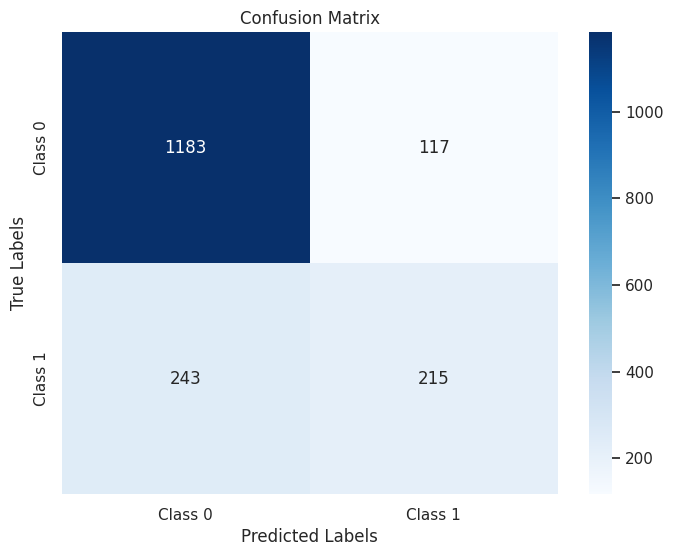

In [51]:
cm = confusion_matrix(y_test, y_pred_rf)

class_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> ANN </div>

In [52]:
X_train.shape[1]

36

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.004)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(32, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(16, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(8, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,745 (61.50 KB)

 Trainable params: 15,745 (61.50 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=64,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6593 - loss: 1.1005 - val_accuracy: 0.7713 - val_loss: 0.8748
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7590 - loss: 0.8848 - val_accuracy: 0.7816 - val_loss: 0.7787
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7777 - loss: 0.7977 - val_accuracy: 0.7850 - val_loss: 0.7276
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7960 - loss: 0.7240 - val_accuracy: 0.7765 - val_loss: 0.6853
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7764 - loss: 0.6873 - val_accuracy: 0.7850 - val_loss: 0.6338
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7979 - loss: 0.6369 - val_accuracy: 0.7941 - val_loss: 0.6013
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8032 - loss: 0.6040 - val_accuracy: 0.7804 - val_loss: 0.5849
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7906 - loss: 0.5893 - val_accuracy: 0.7787 - v

In [55]:
loss_and_metrics = model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7908 - loss: 0.4448  
[0.44318971037864685, 0.7906712293624878]
Loss =  0.44318971037864685
Accuracy =  0.7906712293624878


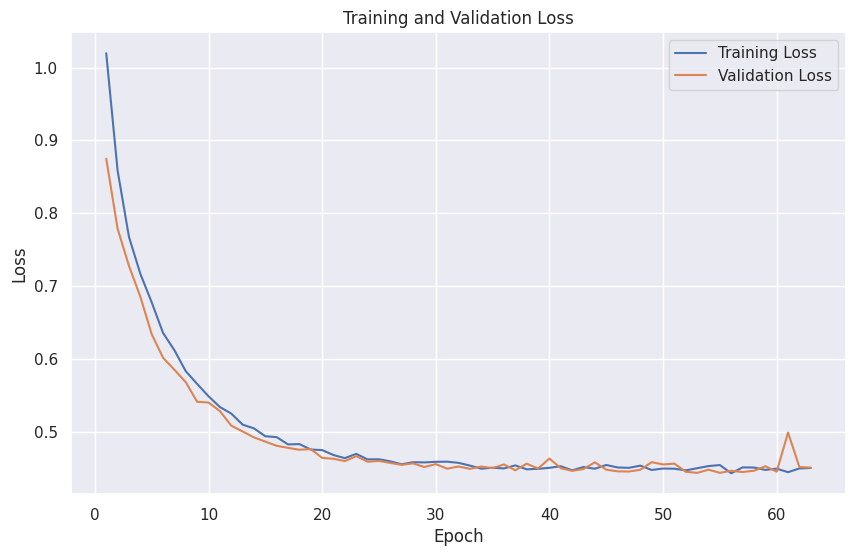

In [56]:
plt.figure(figsize=(10, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [57]:
predicted = model.predict(X_test)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


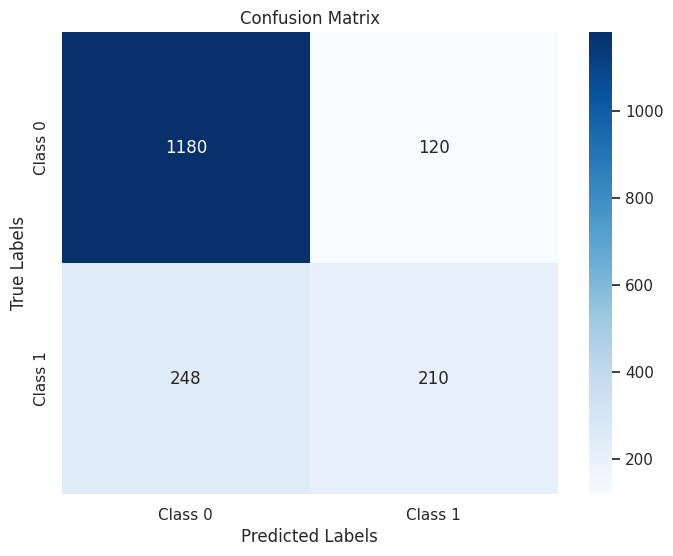

In [58]:
cm = confusion_matrix(y_test, predicted)

class_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LSTM </div>

In [59]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1], 1), activation="tanh", 
                         return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.LSTM(64, activation="tanh", return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.LSTM(64, activation="tanh", return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.LSTM(2, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(1, activation="sigmoid")])

model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True)

model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 36, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 36, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 36, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 36, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 2)              │           536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,531 (584.11 KB)

 Trainable params: 149,531 (584.11 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
history_lstm = model_lstm.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=64,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.7145 - loss: 0.8110 - val_accuracy: 0.7383 - val_loss: 0.6043
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.7205 - loss: 0.6237 - val_accuracy: 0.7395 - val_loss: 0.5563
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.7304 - loss: 0.5867 - val_accuracy: 0.7298 - val_loss: 0.5537
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.7383 - loss: 0.5683 - val_accuracy: 0.7395 - val_loss: 0.5358
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.7394 - loss: 0.5567 - val_accuracy: 0.7395 - val_loss: 0.5511
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.7272 - loss: 0.5532 - val_accuracy: 0.7395 - val_loss: 0.5361
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.7315 - loss: 0.5539 - val_accuracy: 0.7395 - val_loss: 0.5273
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.7375 - loss: 0.5456 - v

In [61]:
loss_and_metrics = model_lstm.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7782 - loss: 0.4591
[0.45866096019744873, 0.7849829196929932]
Loss =  0.45866096019744873
Accuracy =  0.7849829196929932


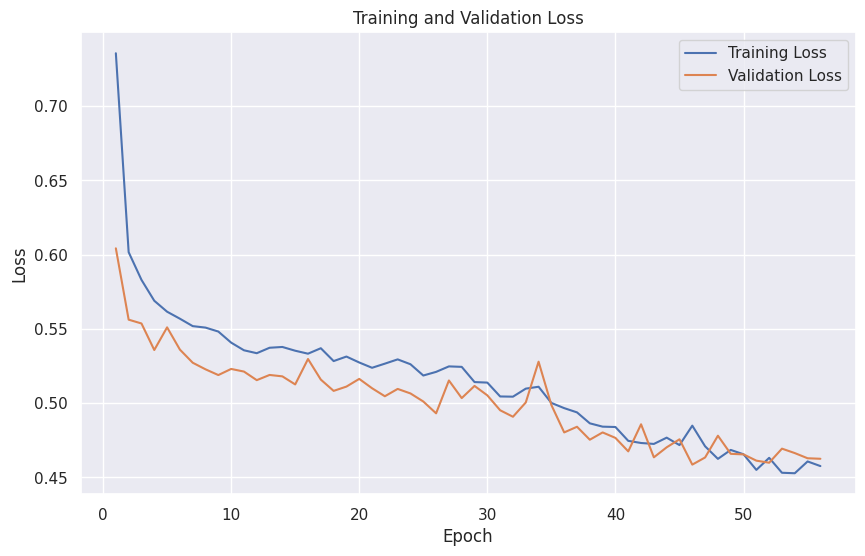

In [62]:
plt.figure(figsize=(10, 6))

train_loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [63]:
predicted = model_lstm.predict(X_test)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


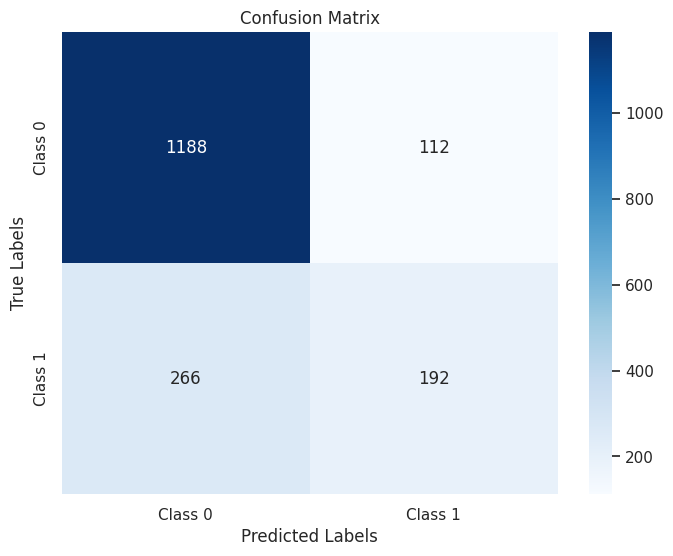

In [64]:
cm = confusion_matrix(y_test, predicted)

class_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()